## This is an example of a polynomial curve fitting model 

Fitting the exponential decay model: 𝐻(𝑡)=𝐻(0)𝑒−𝜆𝑡

Reference: A. Leike (2002). "Demonstration of the Exponential Decay Law Using Beer Froth," European Journal of Physics, Vol. 23, #1, pp. 21-26
#### Measuring the beer foam height and beer height for 3 brands of beers at various time points

The three beers-
1. Erdinger Weissbier (Beer 1)
2. Augustinerbrau Munchen  (Beer 2)
3. Budweiser foam height (Beer 3)

Columns-

* Time from pour (sec) 4-8
* Beer 1 foam height (cm) 10-16
* Beer 2 foam height (cm) 18-24
* Beer 3 (cm) 26-32


In [51]:
import pandas as pd
import numpy as np



In [53]:
url = "http://users.stat.ufl.edu/~winner/data/beer_foam2.dat"
columns = ['Time(s)', 'Beer1', 'Beer2', 'Beer3']
beerdata = np.loadtxt(url)
beerdata

array([[  0. ,  17. ,  14. ,  14. ],
       [ 15. ,  16.1,  11.8,  12.1],
       [ 30. ,  14.9,  10.5,  10.9],
       [ 45. ,  14. ,   9.3,  10. ],
       [ 60. ,  13.2,   8.5,   9.3],
       [ 75. ,  12.5,   7.7,   8.6],
       [ 90. ,  11.9,   7.1,   8. ],
       [105. ,  11.2,   6.5,   7.5],
       [120. ,  10.7,   6. ,   7. ],
       [150. ,   9.7,   5.3,   6.2],
       [180. ,   8.9,   4.4,   5.5],
       [210. ,   8.3,   3.5,   4.5],
       [240. ,   7.5,   2.9,   3.5],
       [300. ,   6.3,   1.3,   2. ],
       [360. ,   5.2,   0.7,   0.9]])

In [55]:
def fitdata(x,t, M):
    '''fitdata(x,t, M) will fit a polynomial of order M to the data (x,t)'''
    #making the big X matrix with all the values of x see the Explanation
    X = np.array([x**m for m in range(M+1)]).T
    # ** is for exponentiation
    # .T is for transpose
    #defining the weights (see Explanation)
    w = np.linalg.inv(X.T@X)@X.T@t  
    #the @ (overload operator) is used for matrix multiplication #matmul can also be used 
    #numpy.linalg.inv(a)[source] 
    #computing the multiplicative inverse of a matrix 
    return w 



[ 1.39973990e+01 -1.82312421e-01  3.12156666e-03 -4.21840887e-05
  3.02586205e-07 -5.71862804e-10 -5.81161038e-12  4.05138442e-14
 -9.89564906e-17  8.67513101e-20]


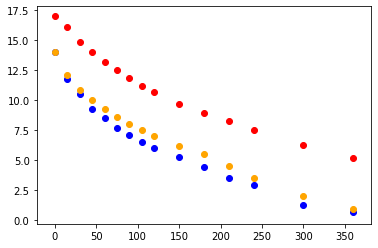

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

#plotting the data points

plt.scatter(beerdata[:,0], beerdata[:,1], color = "red") #1st and 2nd column
plt.scatter(beerdata[:,0], beerdata[:, 2], color = "blue") #1st and 3rd column
plt.scatter(beerdata[:,0], beerdata[:, 3], color = "orange") #1st and 4th column

# now fitting the data using polynomial curve fitting model
#we have to give values of x,t, M,w 
x = beerdata[:,0]
t = beerdata[:,2]
w = fitdata(x,t,M=9)
print(w)

In [58]:

#defining a function to plot the data and the underlying true function

def plotData(x1,t1, x2,t2, x3 = None, t3 = None, legend = []):
  #plotting everything now
    #plotting the training data
    p1 = plt.plot(x1, t1, 'bo')
    #plotting the true data
    p2 = plt.plot(x2, t2, 'g') 
    if (x3 is not None):
       p3 = plt.plot(x3, t3, 'r')
    
    #Adding the title, legend and axes 
    #xlabel
    plt.xlabel('training values (x)')
    plt.ylabel('true values (t)')    
    
    if(x3 is None):
        plt.legend((p1[0], p2[0]), legend)
    else:
        plt.legend((p1[0], p2[0], p3[0]),legend)

C:\Users\shrey\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


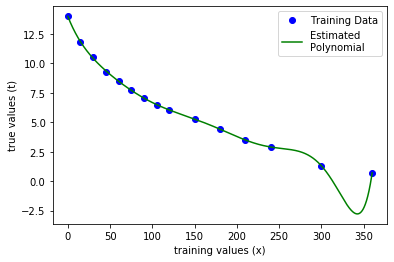

In [60]:
#using the weights 
xrange = np.arange(beerdata[0,0], beerdata[beerdata.shape[0]-1,0], 0.001) #getting equally spaced points 
#numpy.arange([start], stop, [step], dtype=None)
# [start] = beerdata[0,0]
#stop = beerdata[beerdata.shape[0]-1]
#step =0.001

X = np.array([xrange**m for m in range(w.size)]).T
estimatedy = X@w #matrix multiplication
#estimatedy is the computed predicted value

plotData(x,t, xrange, estimatedy, legend = ['Training Data', 'Estimated \nPolynomial'])


In [62]:
#predicting the foam height a t = (enter value of your choice)
# t should be defined as float so it can take decimal values 

predict_t = np.float(200)

test_x = np.array([predict_t **m for m in range (w[:, None]. size)]).T
print(test_x)
predicted_height = test_x@w
print(predicted_height)

[1.00e+00 2.00e+02 4.00e+04 8.00e+06 1.60e+09 3.20e+11 6.40e+13 1.28e+16
 2.56e+18 5.12e+20]
3.7888974981108845
